In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [5]:
def f1(x):
    return 2*np.sin(x)-x**2/10

def seccion_dorada(f,x):
    R = (np.sqrt(5)-1)/2
    xl,xu = x
    i = 0
    while True:
        d = R*(xu - xl)
        x1 = xl + d 
        x2 = xu - d
        if f(x1)>f(x2):
            xl = x2
            xopt = x1
        else:
            xu = x1
            xopt = x2
        ea = (1-R)*(xu - xl)/xopt*100
        if ea < 0.1:
            return xopt, i
        i=i+1

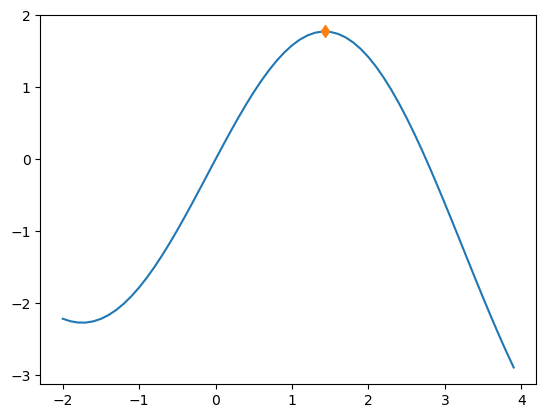

In [15]:
xopt,iter = seccion_dorada(f1,[0,4])
iter
x = np.arange(-2,4,0.1)
plt.plot(x,f1(x))
plt.plot(xopt,f1(xopt),'d')

In [20]:
def f2(x,y):
    return y-x-2*x**2-2*x*y-y**2
x = []
y = []
def busquedadorada(f,x,y,n):
    for i in range(n):
        xi = x[0]+(x[1]-x[0])*np.random.random()
        yi = y[0]+(y[1]-y[0])*np.random.random()
        x.append(xi)
        y.append(yi)
        if i != 0:
            if f(xi,yi) > f(xopt,yopt):
                xopt = xi
                yopt = yi
        else:
            xopt = xi
            yopt = yi
    return xopt, yopt, x, y

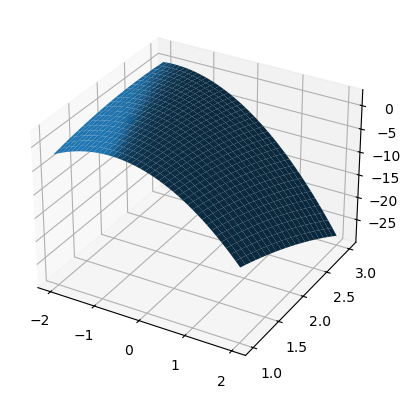

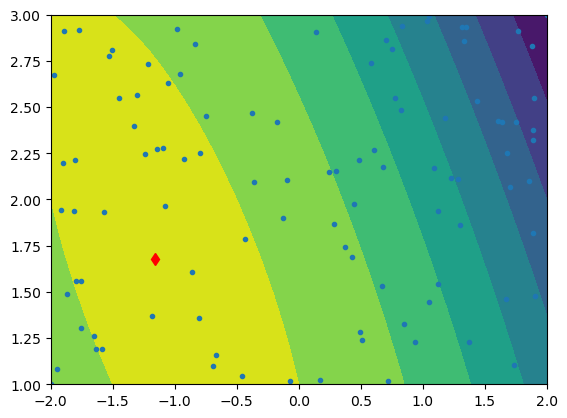

In [25]:
xopt,yopt,xp,yp = busquedadorada(f2,[-2,2],[1,3],100)
x = np.arange(-2,2+0.1,0.1)
y = np.arange(1,3+0.1,0.1)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X,Y,Z)
ax.scatter(xopt,yopt,f2(xopt,yopt),marker = 'o')
plt.show()
plt.figure()
plt.plot(xp,yp,'.')
plt.plot(xopt,yopt,'rd')
plt.contourf(X,Y,Z)


In [ ]:
f2(xopt,yopt)

1.2499825477780502

In [ ]:
# Interpolacion cuadrática
import numpy as np 
import matplotlib.pyplot as plt 

def f1(x):
    return 2*np.sin(x)-x**2/10

def inter_cuadratica(f,x):
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    i = 0
    while True:   
        x3 = (f(x0)*(x1**2-x2**2)+f(x1)*(x2**2-x0**2)+f(x2)*(x0**2-x1**2))/(2*f(x0)*(x1-x2)+2*f(x1)*(x2-x0)+2*f(x2)*(x0-x1))
        ea = abs((f(x3) - f(x1))/f(x3))*100
        if ea < 0.01:
            break
        i = i + 1
        print(x0,x1,x2,x3,f(x3),ea)
        if (f(x3)>f(x1)) & (x3>x1):
            x0 = x1
            x1 = x3
        elif (f(x3)>f(x1)) & (x3<x1):
            x2 = x1
            x1 = x3
        elif (f(x3)<f(x1)) & (x3>x1):
            x2 = x3
        elif (f(x3)<f(x1)) & (x3<x1):
            x2 = x1
            x1 = x3                 
    return x3, ea, i


In [72]:
a = inter_cuadratica(f1,[0,1,4])
a

0 1 4 1.5055348739896623 1.7690789285139574 10.521687636318253
1 1.5055348739896623 4 1.4902527508500858 1.77143091252755 0.1327731156185309
1 1.4902527508500858 1.5055348739896623 1.425635954284261 1.7757216536533067 0.24163365451612592


(1.426601522584456, 0.0001698178740085484, 3)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

def fun(x):
    f = 2*np.sin(x)-x**2/10
    df = 2*np.cos(x)-x/5
    d2f = -2*np.sin(x)-1/5
    return f, df, d2f

def newton_raphson(f,x0):
    i = 0
    while True:
        fx, dfx, d2fx = f(x0)
        xn = x0 - dfx/d2fx
        ea = abs(xn-x0)
        print(x0,fx,)
        if ea < 1e-4:
            return xn, i
        else:
            x0 = xn
            i+=1

In [14]:
newton_raphson(fun,.5)

(1.4275517788573182, 3)